### Load libraries

In [1]:
import UrbanSound8K_dataprep as U
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import librosa
from sklearn.model_selection import train_test_split
import pickle

### Parameters

In [2]:
# general parameters
PATH = "data"

### Instantiate the Dataset object

In [3]:
dataset = U.UrbanSoundPrep(PATH)

### Load metadata

In [4]:
df = dataset.metadata
labels = dataset.class_mapping

### Data exploration

In [5]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [6]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [7]:
length = dataset.__len__()
length

8732

In [8]:
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [9]:
class_percentage = (df['class'].value_counts() / length) * 100
class_percentage

dog_bark            11.452130
children_playing    11.452130
air_conditioner     11.452130
street_music        11.452130
engine_idling       11.452130
jackhammer          11.452130
drilling            11.452130
siren               10.639029
car_horn             4.912964
gun_shot             4.283097
Name: class, dtype: float64

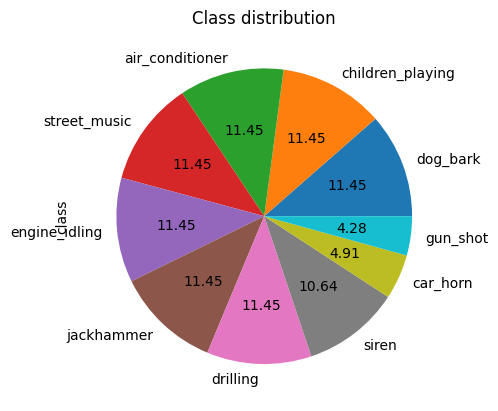

In [10]:
df['class'].value_counts().plot.pie(autopct='%.2f')
plt.title("Class distribution")
plt.savefig("figures/class_distribution.png", bbox_inches='tight')

In [11]:
df['durations'] = df['end'] - df['start']
df

,slice_file_name,fsID,start,end,salience,fold,classID,class,durations
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,0.317551
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,4.000000
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,4.000000
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,4.000000
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,4.000000
...,...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn,4.000000
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn,2.142545
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn,3.505983
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn,2.532098


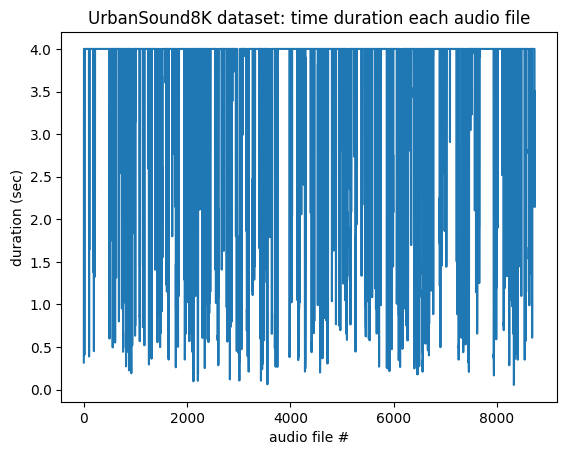

In [12]:
df.durations.plot()
plt.xlabel("audio file #")
plt.ylabel("duration (sec)")
plt.title("UrbanSound8K dataset: time duration each audio file")
plt.savefig("figures/durations.png", bbox_inches='tight')

In [13]:
df['durations'].describe()

count    8732.000000
mean        3.607904
std         0.973570
min         0.054517
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: durations, dtype: float64

In [14]:
df_short = df[df['durations'] < 4]
df_short

,slice_file_name,fsID,start,end,salience,fold,classID,class,durations
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,0.317551
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn,0.648525
10,100648-1-1-0.wav,100648,8.998279,10.052132,2,10,1,car_horn,1.053853
11,100648-1-2-0.wav,100648,16.699509,17.104837,2,10,1,car_horn,0.405328
12,100648-1-3-0.wav,100648,17.631764,19.253075,2,10,1,car_horn,1.621311
...,...,...,...,...,...,...,...,...,...
8681,99185-3-0-0.wav,99185,0.341411,0.950911,1,5,3,dog_bark,0.609500
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn,2.142545
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn,3.505983
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn,2.532098


### Check if all files have the same sample rate

In [15]:
sample_rates = []
number_of_channels = []
number_of_samples = []
for i in range(0,length):
    waveform, sample_rate, label = dataset.__getitem__(i)
    
    number_of_channels.append(waveform.shape[0])
    number_of_samples.append(waveform.shape[1])
    sample_rates.append(sample_rate)    

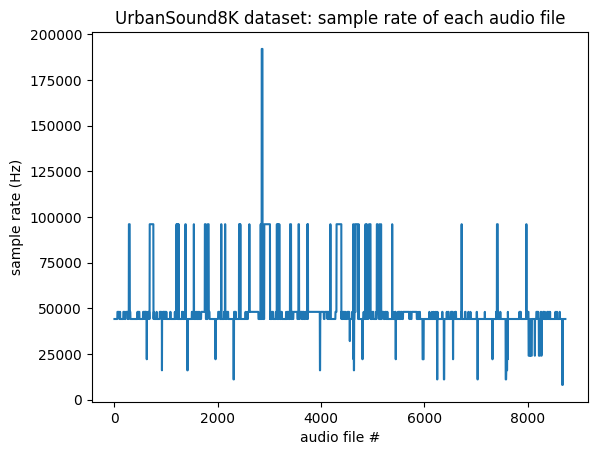

In [16]:
plt.figure()
plt.plot(sample_rates)
plt.xlabel("audio file #")
plt.ylabel("sample rate (Hz)")
plt.title("UrbanSound8K dataset: sample rate of each audio file")
plt.savefig("figures/sample_rates.png", bbox_inches='tight')

In [17]:
np.mean(sample_rates)

48456.97927164452

In [18]:
min(sample_rates)

8000

In [19]:
max(sample_rates)

192000

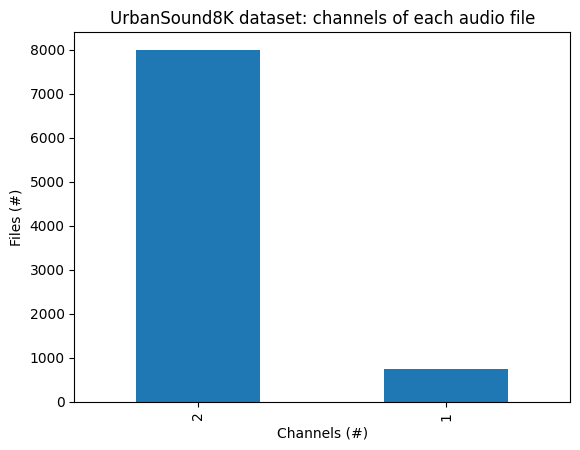

In [20]:
number_of_channels_df = pd.DataFrame()
number_of_channels_df['channels'] = number_of_channels
number_of_channels_df['channels'].value_counts().plot.bar()
plt.xlabel("Channels (#)")
plt.ylabel("Files (#)")

plt.title("UrbanSound8K dataset: channels of each audio file")
plt.savefig("figures/number_of_channels.png", bbox_inches='tight')

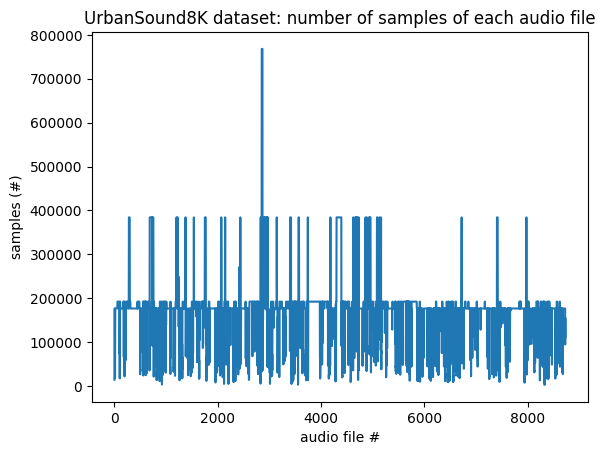

In [21]:
plt.figure()
plt.plot(number_of_samples)
plt.xlabel("audio file #")
plt.ylabel("samples (#)")
plt.title("UrbanSound8K dataset: number of samples of each audio file")
plt.savefig("figures/number_of_samples.png", bbox_inches='tight')

In [22]:
waveform, sample_rate, label = dataset.__getitem__(1)

In [23]:
num_channels, samples = waveform.shape
num_channels

2

In [24]:
samples

176400

### Check process pipeline when down-sampling

In [25]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
    
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
    if num_channels > 1:
        axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
        axes[c].set_xlim(xlim)
    if ylim:
        axes[c].set_ylim(ylim)
    figure.suptitle(title)
    plt.show(block=False)

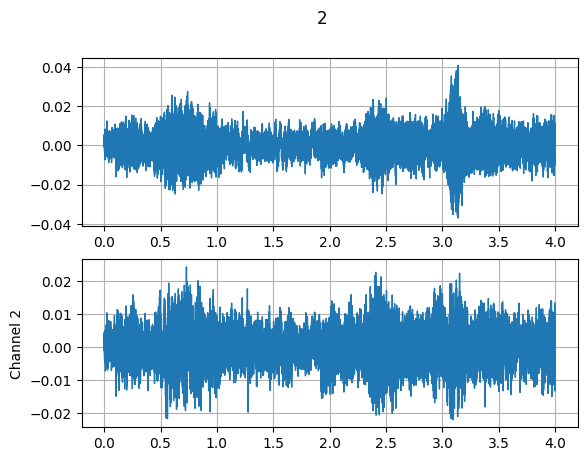

In [26]:
dataset = U.UrbanSoundPrep(PATH, preprocess=False )
waveform, sample_rate, label =  dataset.__getitem__(1)
plot_waveform(waveform, sample_rate, label)

In [27]:
print("Raw waveform")
print("The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

Raw waveform
The sample_rate is : 44100 and the number of samples is: 176400


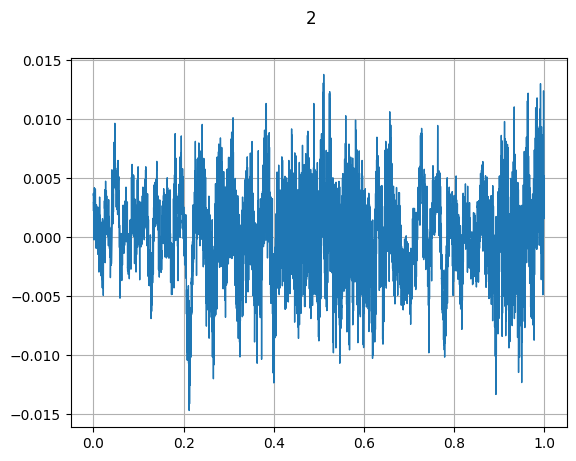

In [28]:
dataset = U.UrbanSoundPrep(PATH, preprocess=True, resample_rate=22050, number_of_samples=22050)
waveform, sample_rate, label =  dataset.__getitem__(1)
plot_waveform(waveform, sample_rate, label)

In [29]:
print("Processed waveform")
print("The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

Processed waveform
The sample_rate is : 22050 and the number of samples is: 22050


### Check process pipeline when up-sampling

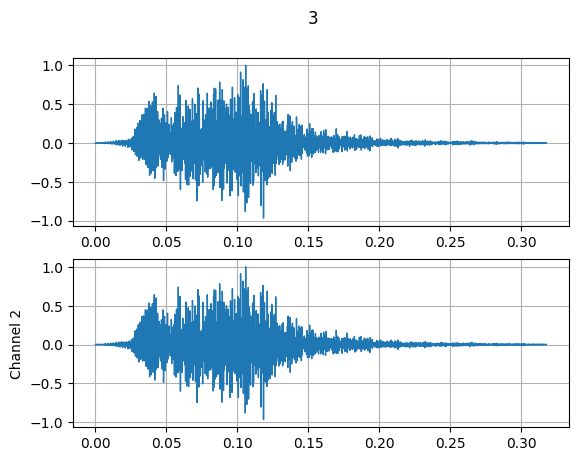

In [30]:
dataset = U.UrbanSoundPrep(PATH, preprocess=False )
waveform, sample_rate, label =  dataset.__getitem__(0)
plot_waveform(waveform, sample_rate, label)

In [31]:
print("Processed waveform")
print("The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

Processed waveform
The sample_rate is : 44100 and the number of samples is: 14004


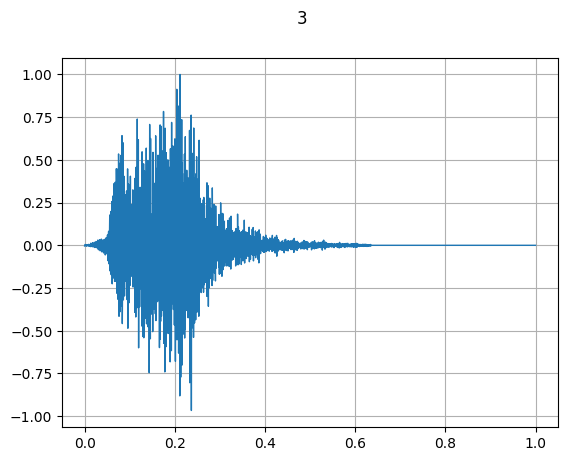

In [32]:
dataset = U.UrbanSoundPrep(PATH, preprocess=True, resample_rate=22050, number_of_samples=22050)
waveform, sample_rate, label =  dataset.__getitem__(0)
plot_waveform(waveform, sample_rate, label)

In [33]:
print("Processed waveform")
print("The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

Processed waveform
The sample_rate is : 22050 and the number of samples is: 22050


## Visualize the features

In [34]:
def plot_waveform(waveform, sample_rate, label):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    
    figure = plt.figure(figsize=(16,2))
    
    plt.plot(time_axis, waveform[0])
    key = [k for k, v in labels.items() if v == label]
    plt.title(key)
    plt.xlabel('Time (sec)')
    plt.ylabel('Amplitude (a.u.)')

In [35]:
dataset_waves = U.UrbanSoundPrep(PATH, preprocess=True, resample_rate=22050, number_of_samples=22050)
df = dataset.metadata

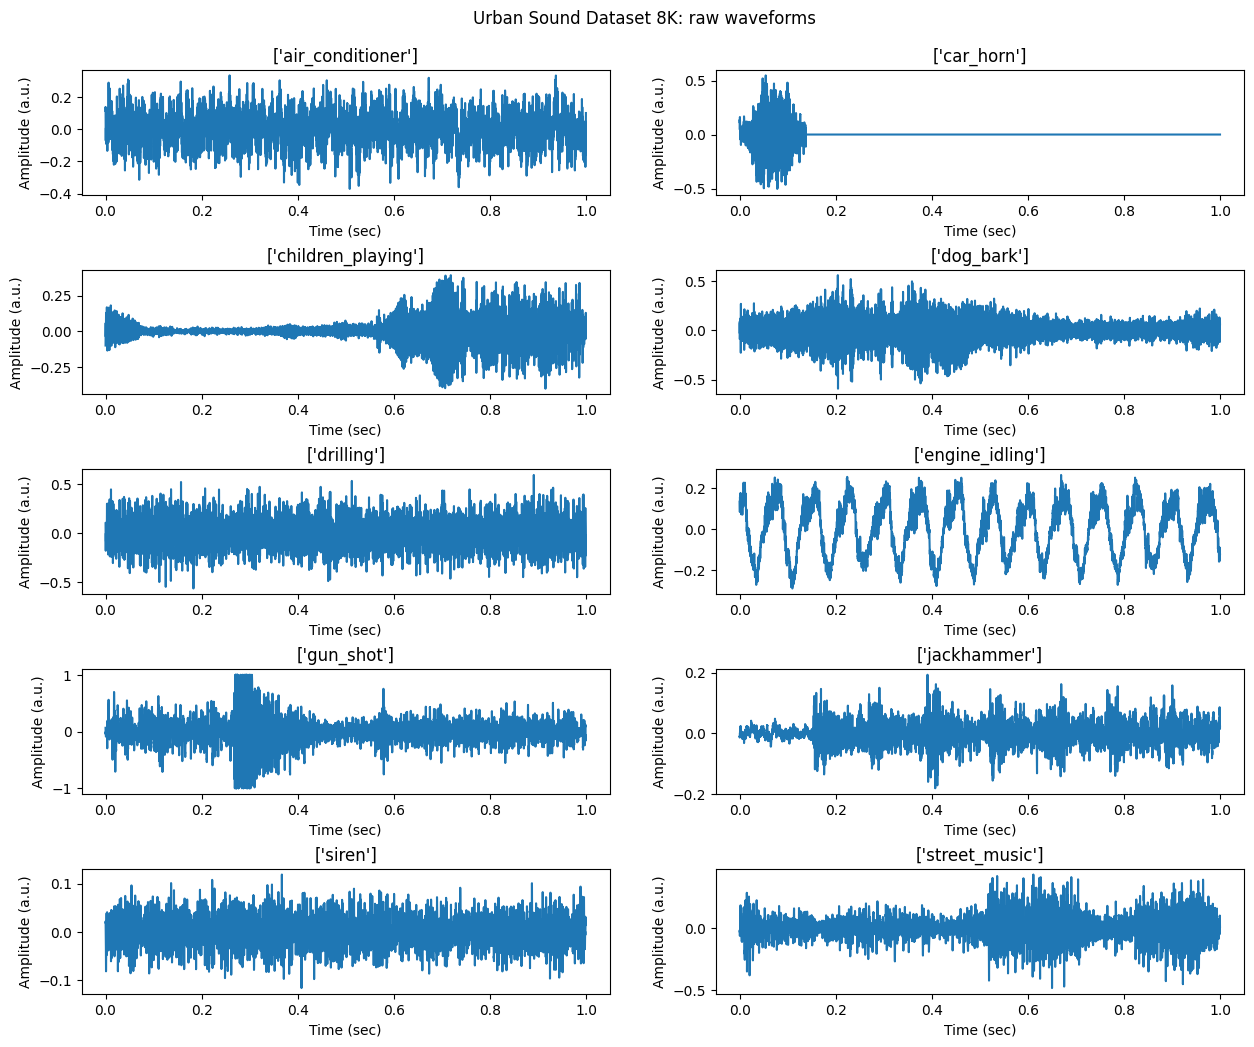

In [36]:
labels = dataset.class_mapping

sample_idx = 10
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("Urban Sound Dataset 8K: raw waveforms", y=0.93)

for label, ax in zip(labels.keys(), axs.ravel()):
    index = df.index[df['class']==label].tolist()
    waveform, sample_rate, label = dataset_waves.__getitem__(index[sample_idx])
    
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    ax.plot(time_axis, waveform[0])
    key = [k for k, v in labels.items() if v == label]
    ax.set_title(key)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amplitude (a.u.)')

## Plot Melspectrograms

In [37]:
sample_rate = 22050

n_fft = 1024
win_length = None
hop_length = 512
n_mels = 64

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

dataset_melspecs = U.UrbanSoundPrep(PATH, preprocess=True, transform=mel_spectrogram, resample_rate=22050, number_of_samples=22050)

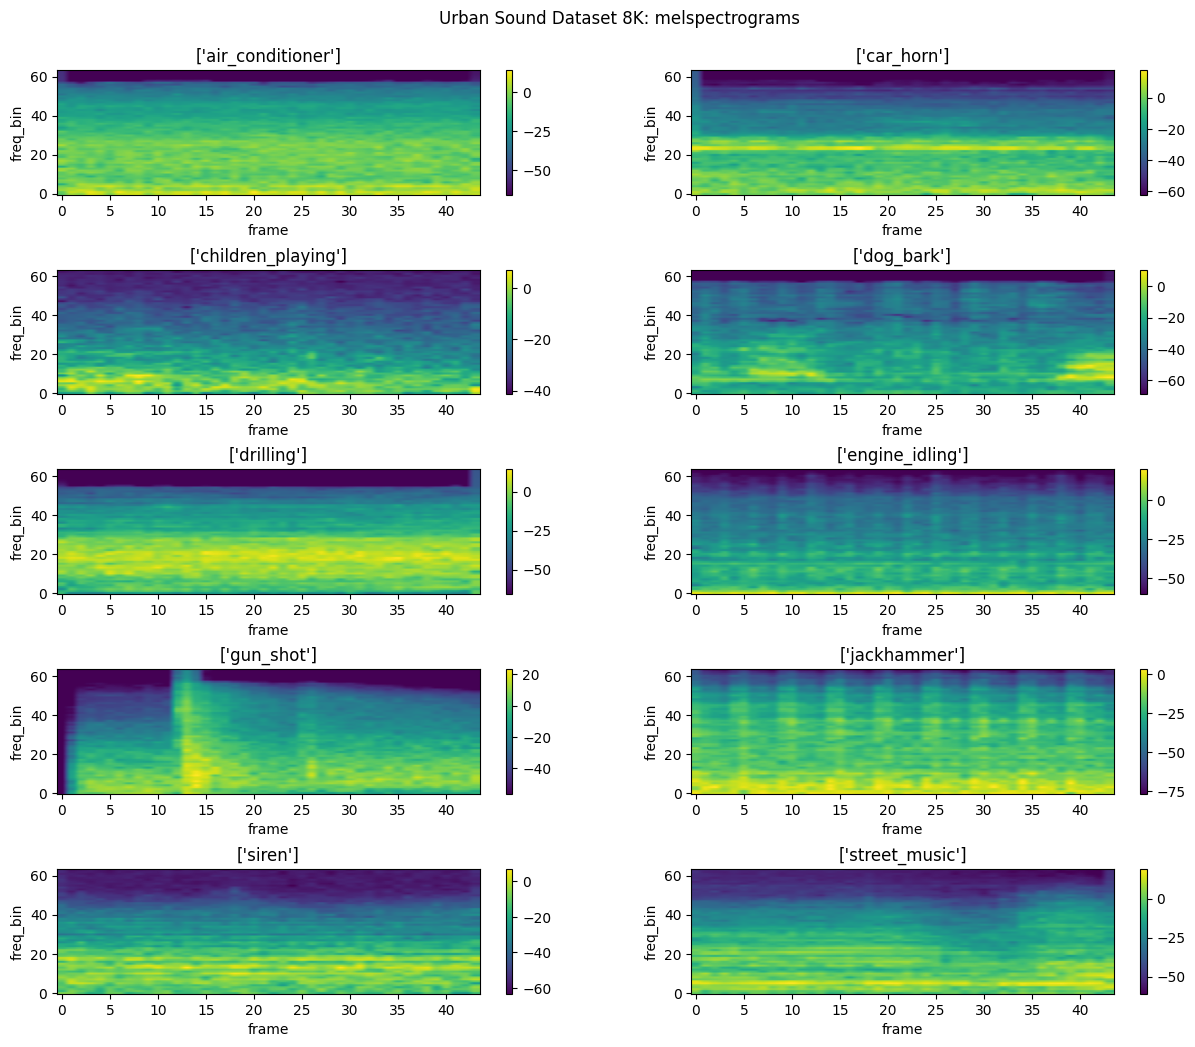

In [38]:
sample_idx = 20
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("Urban Sound Dataset 8K: melspectrograms", y=0.93)

for label, ax in zip(labels.keys(), axs.ravel()):
    index = df.index[df['class']==label].tolist()
    waveform, sample_rate, label = dataset_melspecs.__getitem__(index[sample_idx])
    
    im = ax.imshow(librosa.power_to_db(waveform[0]), origin="lower", aspect="auto")
    fig.colorbar(im, ax=ax)
#     plt.show(block=False)
    key = [k for k, v in labels.items() if v == label]
    ax.set_title(key)
    ax.set_xlabel('frame')
    ax.set_ylabel('freq_bin')

## Plot MFCCs


In [39]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 128
n_mfcc = 13

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
      'n_fft': n_fft,
      'n_mels': n_mels,
      'hop_length': hop_length,
      'mel_scale': 'htk',
    }
)

dataset_mfcc = U.UrbanSoundPrep(PATH, preprocess=True, transform=mfcc_transform, resample_rate=22050, number_of_samples=22050)

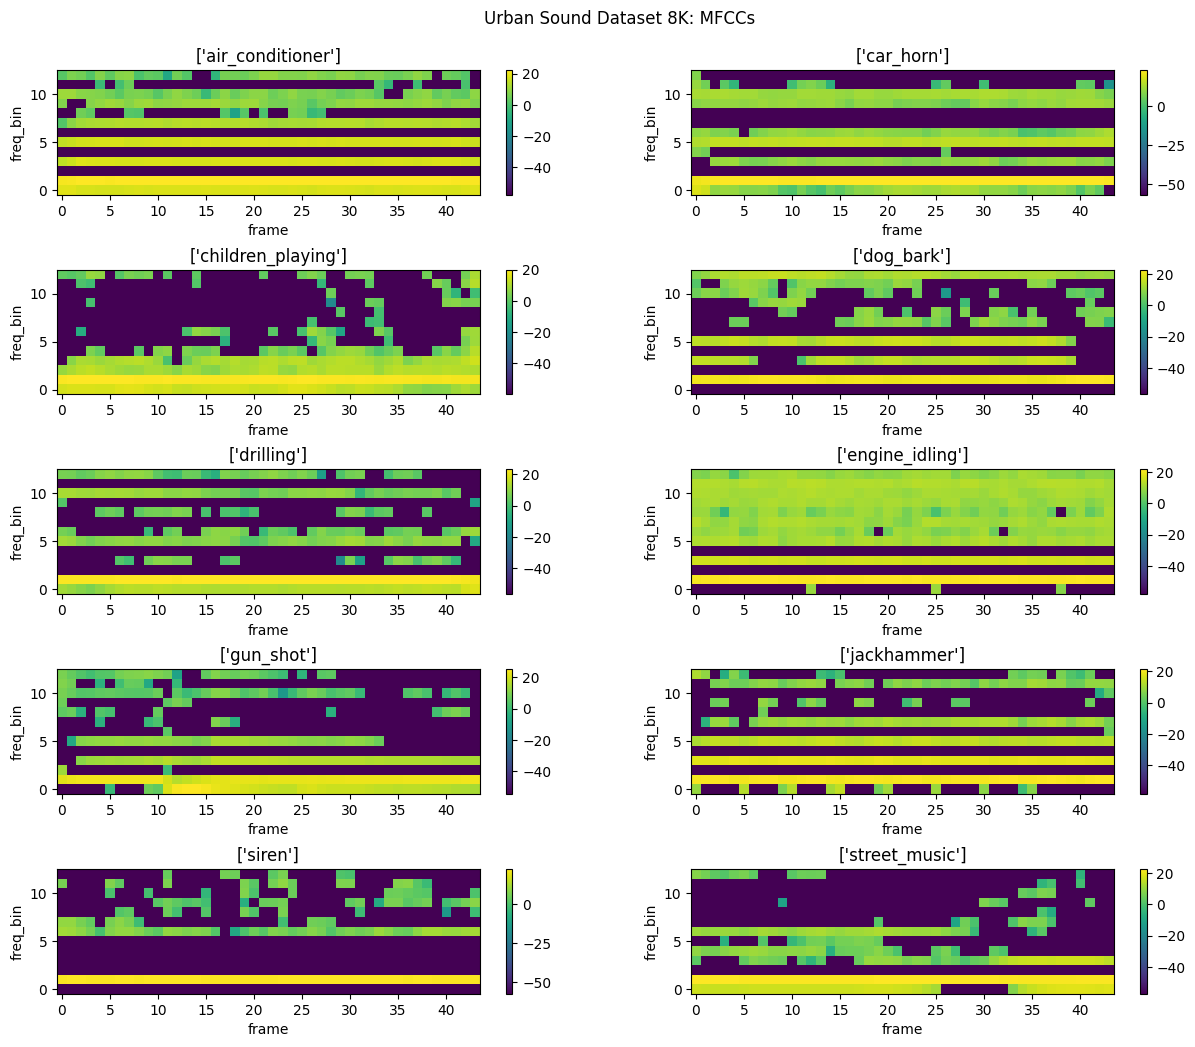

In [40]:
sample_idx = 20
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("Urban Sound Dataset 8K: MFCCs", y=0.93)

for label, ax in zip(labels.keys(), axs.ravel()):
    index = df.index[df['class']==label].tolist()
    waveform, sample_rate, label = dataset_mfcc.__getitem__(index[sample_idx])
    
    im = ax.imshow(librosa.power_to_db(waveform[0]), origin="lower", aspect="auto")
    fig.colorbar(im, ax=ax)
#     plt.show(block=False)
    key = [k for k, v in labels.items() if v == label]
    ax.set_title(key)
    ax.set_xlabel('frame')
    ax.set_ylabel('freq_bin')

### save datasets

In [41]:

with open('data_waves.pickle', 'wb') as handle:
    pickle.dump(dataset_waves, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
with open('data_melspecs.pickle', 'wb') as handle:
    pickle.dump(dataset_melspecs, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
with open('data_mfcc.pickle', 'wb') as handle:
    pickle.dump(dataset_mfcc, handle, protocol=pickle.HIGHEST_PROTOCOL)
                

In [42]:
signal, sr, label = dataset_mfcc[1]

In [43]:
sr

22050

In [44]:
with open('data_mfcc.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [52]:
for i, data in enumerate(dataset_melspecs):
  torch.save(data[0], 'test'.format(i))


In [57]:
for idx, tensor in enumerate(dataset_melspecs):
    torch.save(tensor, f"data/melspecs/tensor{idx}.pt")

In [58]:
dataset_melspecs[0]

(tensor([[[1.6020e-04, 3.3969e-05, 8.5295e-05,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.1890e-04, 1.3728e-04, 1.8142e-04,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [6.1583e-05, 1.1618e-04, 6.0610e-04,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [6.9771e-07, 8.3424e-07, 1.5109e-06,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [5.9436e-07, 7.0873e-07, 1.0867e-06,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [8.3484e-07, 8.8388e-07, 9.0630e-07,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]]]),
 22050,
 3)

In [ ]:
for idx, tensor in enumerate(dataset_mfcc):
    torch.save(tensor, f"data/mfcc/tensor{idx}.pt")

In [ ]:
for idx, tensor in enumerate(dataset_waves):
    torch.save(tensor, f"data/waves/tensor{idx}.pt")